In [0]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt
from matplotlib.pyplot import imread
from scipy.io import loadmat

In [0]:
df_train = pd.read_csv("dataset/index_train.csv")
df_test = pd.read_csv("dataset/index_test.csv")

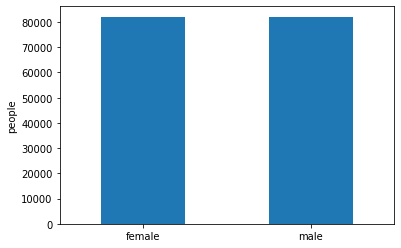

In [0]:
df_train['gender'].value_counts().plot.bar(rot=0)
plt.ylabel('people')
plt.show()

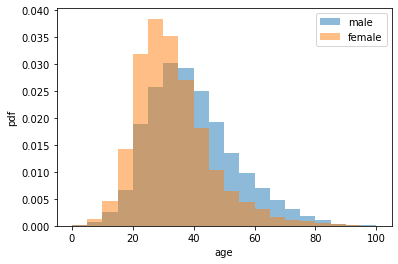

In [0]:
categories = df_train['gender'].unique()
bin_range = (df_train['age'].min(), df_train['age'].max())

for c in categories:
    plt.hist(df_train[df_train['gender'] == c]['age'], alpha=0.5, label=c, range=bin_range, bins=20, density=True)
plt.legend()
plt.ylabel('pdf')
plt.xlabel('age')
plt.show()

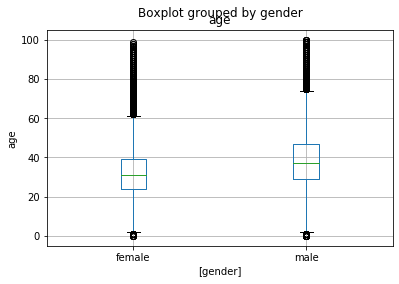

In [0]:
df_train[['age', 'gender']].boxplot(by='gender')
plt.ylabel('age')
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


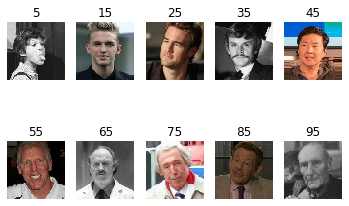

In [0]:
ages = range(5, 100, 10)
fig, plts = plt.subplots(2, 5)

for i in range(2):
    for j in range(5):
        age = ages[5 * i + j]
        file_name = df_train.loc[np.where((df_train['age'] == age) & (df_train['gender'] == 'male'))[0][3], 'file_name']
        image = imread("dataset/train/{}.jpg".format(file_name), "jpg")
        plts[i, j].imshow(image)
        plts[i, j].set_title(age)
        plts[i, j].axis('off')

fig.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


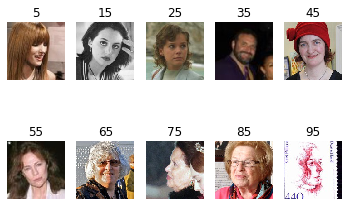

In [0]:
fig, plts = plt.subplots(2, 5)

for i in range(2):
    for j in range(5):
        age = ages[5 * i + j]
        file_name = df_train.loc[np.where((df_train['age'] == age) & (df_train['gender'] == 'female'))[0][0], 'file_name']
        image = imread("dataset/train/{}.jpg".format(file_name), "jpg")
        plts[i, j].imshow(image)
        plts[i, j].set_title(age)
        plts[i, j].axis('off')

fig.show()

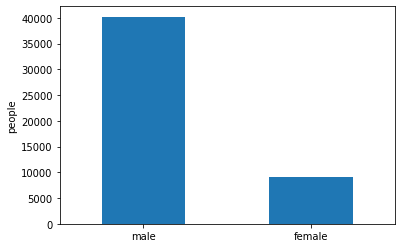

In [0]:
df_test['gender'].value_counts().plot.bar(rot=0)
plt.ylabel('people')
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


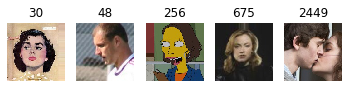

In [0]:
under_5 = list(df_train.loc[df_train['age'] <= 5, 'file_name'])
at_6 = list(df_train.loc[df_train['age'] > 90, 'file_name'])
prob = [30, 48, 256, 675, 2449]
fig, plts = plt.subplots(1, 5)

for i in range(5):
    file_name = prob[i]
    image = imread("dataset/train/{}.jpg".format(file_name), "jpg")
    plts[i].imshow(image)
    plts[i].set_title(file_name)
    plts[i].axis('off')
   
fig.show()

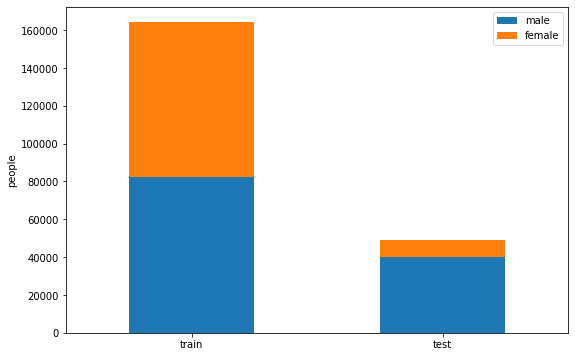

In [0]:
d = {'male': [df_train['gender'].value_counts()['male'], df_test['gender'].value_counts()['male']],
     'female': [df_train['gender'].value_counts()['female'], df_test['gender'].value_counts()['female']]}
count_matrix = pd.DataFrame(d)
count_matrix = count_matrix.set_index(pd.Index(['train', 'test']))
count_matrix.plot(kind='bar', stacked=True, rot=0, figsize=(9, 6))
plt.ylabel('people')
plt.legend(loc=1)
plt.show()

In [0]:
train_raw = loadmat("dataset/wider_face_split/wider_face_train.mat")

In [0]:
train_raw.keys()

dict_keys(['__header__', '__version__', '__globals__', 'blur_label_list', 'event_list', 'expression_label_list', 'face_bbx_list', 'file_list', 'illumination_label_list', 'invalid_label_list', 'occlusion_label_list', 'pose_label_list'])

In [0]:
num_face = []
for i in train_raw['blur_label_list']:
    for j in i[0]:
        num_face.append(len(j[0]))

file = []
i = 0
for j in train_raw['file_list']:
    for k in j[0]:
        file += list(k[0]) * num_face[i]
        i += 1
    
x1 = []
y1 = []
width = []
height = []
for i in train_raw['face_bbx_list']:
    for j in i[0]:
        for k in j[0]:
            x, y, w, h = k
            x1.append(x)
            y1.append(y)
            width.append(w)
            height.append(h)      

blur = []
for i in train_raw['blur_label_list']:
    for j in i[0]:
        for k in j[0]:
            blur.append(k[0])

expression = []
for i in train_raw['expression_label_list']:
    for j in i[0]:
        for k in j[0]:
            expression.append(k[0])
        
illumination = []
for i in train_raw['illumination_label_list']:
    for j in i[0]:
        for k in j[0]:
            illumination.append(k[0])
        
invalid = []
for i in train_raw['invalid_label_list']:
    for j in i[0]:
        for k in j[0]:
            invalid.append(k[0])
        
occlusion = []
for i in train_raw['occlusion_label_list']:
    for j in i[0]:
        for k in j[0]:
            occlusion.append(k[0])
        
pose = []
for i in train_raw['pose_label_list']:
    for j in i[0]:
        for k in j[0]:
            pose.append(k[0])
        
wf_train = pd.DataFrame([file, x1, y1, width, height, blur, expression, illumination, invalid, occlusion, pose]).transpose()
wf_train.columns = ['file', 'x1', 'y1', 'width', 'height', 'blur', 'expression', 'illumination', 'invalid', 'occlusion', 'pose']

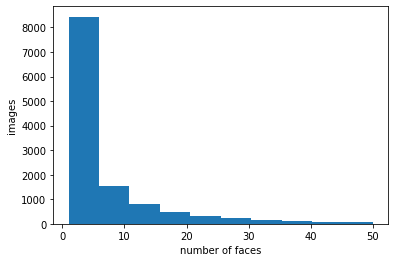

In [0]:
plt.hist([i for i in num_face if i <= 50], bins=10)
plt.ylabel('images')
plt.xlabel('number of faces')

In [0]:
def path(file_name):
    if file_name[:2] in ['5_', '8_', '9_', '10', '15', '16', '20', '24', '25', '26', '28', '29', '31', '32', '39', '42', '43', '47', '48', '61']:
        folder_list = file_name.split('_')[:3]
        folder = '--'.join([folder_list[0], '_'.join(folder_list[1:])])
    elif file_name[:2] in ['50', '55']:
        folder_list = file_name.split('_')[:4]
        folder = '--'.join([folder_list[0], '_'.join(folder_list[1:])])
    elif file_name[:2] == '59':
        folder = '59--people--driving--car'
    else:
        folder = '--'.join(file_name.split('_')[:2])
    suffix = file_name + '.jpg'
    ret = '/'.join(['dataset/WIDER_train/images', folder, suffix])
    return ret

In [0]:
wf_train.head()

,file,x1,y1,width,height,blur,expression,illumination,invalid,occlusion,pose
0,0_Parade_marchingband_1_849,449,330,122,149,0,0,0,0,0,0
1,0_Parade_Parade_0_904,361,98,263,339,0,0,0,0,0,0
2,0_Parade_marchingband_1_799,78,221,7,8,2,0,0,0,0,0
3,0_Parade_marchingband_1_799,78,238,14,17,2,0,0,0,0,0
4,0_Parade_marchingband_1_799,113,212,11,15,2,0,0,0,0,0


In [0]:
df_train.head()

,file_name,age,gender
0,0,38,male
1,1,65,male
2,2,42,female
3,3,54,male
4,4,33,female
